# Programming for Data Analysis Project
### Data Set Simulation: Healthy Ireland Survey 2019

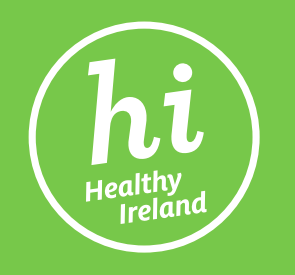 

### Submission Date : 03/01/2022

#### Introduction

The aim of this project is to simulate data using Python that mirrors a real-world phenomenon. The following Python modules are used to simulate and investigate the dataset and the relationships between its dependent and independent variables:
- NumPy Random
- SciPy Stats
- Pandas
- Matplotlib Pyplot/Seaborn

The phenomenon I've chosen is the general health of the Irish population, and the simulation is based largely on the results of the 2019 Healthy Ireland survey. This is an annual, interviewer-administered, face to face study commissioned by the Department of Health, and is part of the Healthy Ireland framework to improve the health and wellbeing of people living in Ireland. 

Its main objectives are: 
- To provide current and credible data to monitor the efficacy of other Healthy Ireland framework initiatives 
- To ensure Ireland meets its international reporting requiremnts
- Support the Department of Health in policy prioritization and awareness-raising initiatives

The survey covers a wide range of topics including physical measurements, alcohol and tobacco consumption, general health, sleep quality and physical activity levels. 

I chose this survey as the basis for the simulated dataset as my undergraduate degree was in Nutritional Science, with a strong emphasis on public health. Although I no longer work in this area, I have maintained a strong interest in it.

The simulation has three main components:
- Demographic Factors (independent variables) - age, gender, employment and socioeconomic status
- Health Outcomes  (dependent variables) - BMI, physical activity levels, alcohol consumption, smoking status, hours sleep. 
- Relationships between variables, based on figures reported in the Healthy Ireland survey

In summary, this project will simulate the data provided by the Healthy Ireland survey respondents, and recreate the relationships between demographic factors and reported health outcomes. Once the variables have been generated, they will be plotted to test whether the expected relationships exist. 

#### Part 1: Simulating Independent Variables

##### Survey Respondents 

The Healthy Ireland survey is administered annually to a representative sample of the Irish population. Approximately 7500 people aged 15 or over participated in 2019. 

Participating households are selected using a multistage sampling process that results in all households in Ireland having an equal chance of selection. Households were divided into equal-sized quintiles based on deprivation index, with the first quintile representing the most deprived area and the fifth quintile representing the most affluent area.  

From each of the randomly selected households, one member aged 15 or older is chosen to participate. Survey respondents are weighted to ensure the sample is representative of the Irish population in terms of age group, sex and region.

Therefore, the first task in this simulation is to generate a respondent sample that mirrors the survey design and Irish population. As regional differences in health outcomes did not feature significantly in the Healthy Ireland report, this variable was excluded. The main demographic variablees of interest were gender, age, employment and deprivation index. 

The three independent variables in this dataset are gender, age and deprivation index as these are not related to any other variables. Therefore, these are generated first to simulate the dataset.

##### 1. Gender

First, the proportion of females to males was calculated, as the female population of Ireland is slightly higer than the male.

The gender breakdown of participants wasn't included in the Healthy Ireland survey, so this was extrapolated from 2016 census data.

The below code reads a CSV file downloaded from the CSO website containing the 2016 population figures by gender and regional authority. It filters on the state-level figures for males and females and calculates the percentage for each of these. 

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import skewnorm
from scipy.stats import gamma
from scipy.stats import expon

total_pop = pd.read_csv('Population by Gender 2016.csv')
total_pop = total_pop.rename(columns = {"VALUE": "Population"})
whole_country = total_pop.loc[total_pop['Regional Authority'] == 'State']
male_pop = whole_country.loc[whole_country["Sex"] == "Male"]
female_pop = whole_country.loc[whole_country["Sex"] == "Female"]
percentage_females = female_pop["Population"].values/(female_pop["Population"].values + male_pop["Population"].values) * 100
percentage_males = 100 - percentage_females
print("\n")
print("Total percentage of female Irish population : {}".format(percentage_females))
print("Total percentage of male Irish population  : {}".format(percentage_males))
print("\n")



Total percentage of female Irish population : [50.55659915]
Total percentage of male Irish population  : [49.44340085]




Once the relative proportions for both genders were established, the next step was to generate corresponding data. The below code uses the np.random.choice() function to generate an array with 7500 elements. Each element is assigned a value of "male" or "female" and the probability of assignment for each is based on the population breakdown from the previous section. 

[['Female' '3770']
 ['Male' '3730']]




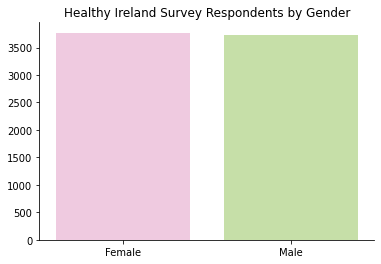

In [2]:
#Generate male/female data points based on probab
genders = ["Female", "Male"]
gender = np.random.choice(a = genders, size = 7500, p = [0.51, 0.49])
unique, counts = np.unique(gender, return_counts = True)
print (np.asarray((unique, counts)).T)
print("\n")

#Barplot showing male/female breakdown
sns.barplot(x = unique, y = counts, palette="PiYG")
plt.title("Healthy Ireland Survey Respondents by Gender")
sns.despine()
plt.show()
plt.close()

As the above output shows, the proportions of male and female respondents are roughly equivalent to the overall population distribution. 

##### 2. Age

As was the case for gender, the exact age breakdown of the survey participants was not provided in the Healthy Ireland report. The age distribution was estimated based on 2016 census data.

According to the census, the median age of the Irish population is 37.48. On the CSO website, there is a pyramind showing a breakdown of the Irish population by age.

[Link to CSO figure]("https://www.cso.ie/en/releasesandpublications/ep/p-cp3oy/cp3/assr/")

This figure appears to have two peaks, one at the age of about 7 and another at about 37.

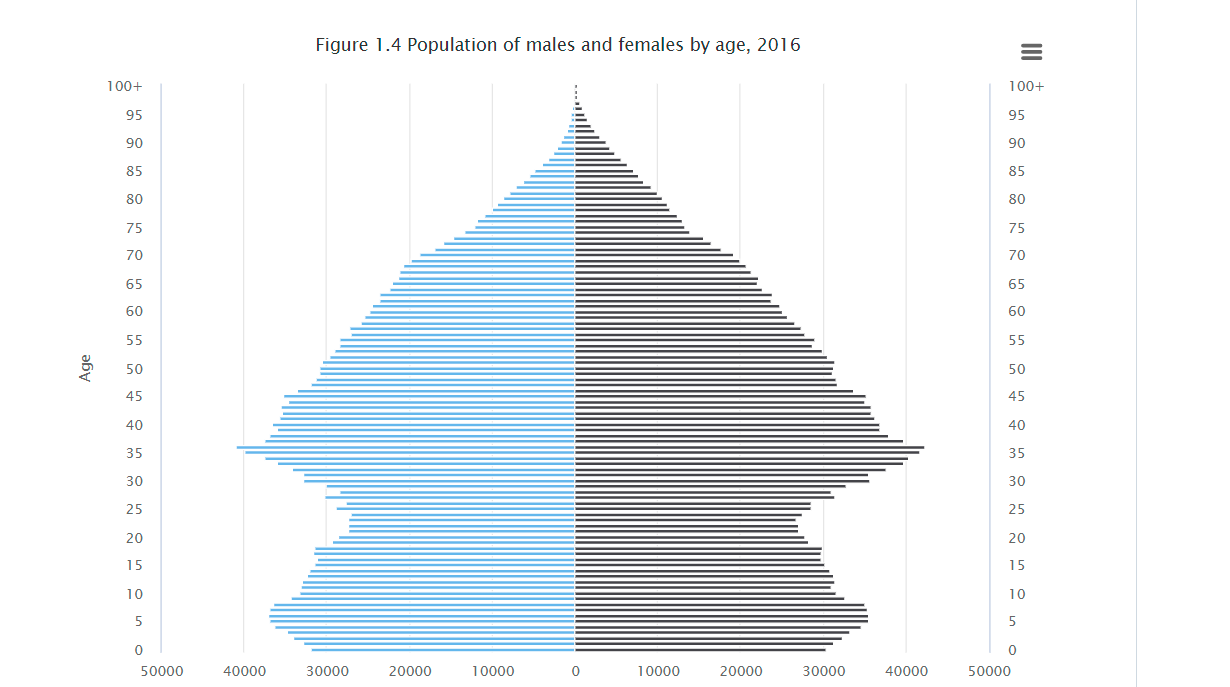

As we are only concered with individuals aged 15 and over for this simulation, a truncated normal distribution was chosen to model the age profile of the respondents. This is a variation of the normal distribution where the domain (x values) are restricted to a certain range. This distribution takes four parameters:
 - Mean
 - Standard deviation
 - Upper bound value
 - Lower bound value
 
Applying the truncated normal distribution to the age variable allows us to set an upper limit of 100 and a lower limit of 15, while maintaining the peak at 37 seen in the CSO figure. 

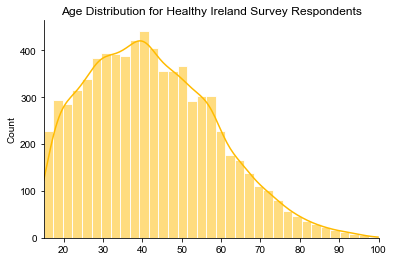

In [3]:
from scipy.stats import truncnorm

#Mean, standard devation and upper and lower limits
#20 was chosen as the standard deviation to replicate the variation seen in the CSO population pyramid
my_mean = 37.4
my_std = 20
myclip_a = 15
myclip_b = 100

#From the scipy stats docs - a and b are shape parameters for the truncnorm distribution
#The below formula can be used to obtain shape parameters for a and b with a given mean, std and upper and lower bound values
a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
age_dist = truncnorm.rvs(a,b, loc = 37.4, scale = 20, size = 7500)

fig, ax = plt.subplots()
sns.histplot(age_dist, kde = True, color = "#ffbb00", edgecolor = "white")
sns.set_style("darkgrid")
plt.title("Age Distribution for Healthy Ireland Survey Respondents", fontsize = 12)
plt.xlim([15, 100])
sns.despine()
plt.show()
plt.close()


age_group = []
#Dividing ages into categories, as this will help with grouping/plotting later

def age_categories (row) :
    if row["Age"] <= 24:
        age_classification = "15-24"
    elif row["Age"] > 24 and row["Age"] <=34:
        age_classification = "25-34"
    elif row["Age"] > 34 and row["Age"] <=44:
        age_classification = "35-44"
    elif row["Age"] > 44 and row["Age"] <=54:
        age_classification = "45-54"
    elif row["Age"] > 54 and row["Age"] <=64:
        age_classification = "55-64"
    elif row["Age"] > 64 and row["Age"] <=74:
        age_classification = "65-74"
    else:
        age_classification = "75+"

    age_group.append(age_classification)

    return(age_classification)

The resulting distribution appears relatively close to that of the original CSO figure, peaking at approximately 37 and gradually tapering off with increased age.

##### 3. Socioeconomic Status

As mentioned earlier in the notebook, survey participants were divided into five quintiles of equal size based on their level of affluence/deprivation. This assignment was based on the Pobal Haase-Pratschke Deprivation Index, which is a series of maps showing the affluence or disadvantage of a particular area, using data compiled from various censuses. The measurements of affluence/deprivation are based on various indicators, such as the proportion of skilled professionals, education and employment levels, and single-parent households found within an area.

[More Info on Pobal Deprivation Profiling](https://maps.pobal.ie)

The below code uses the np.random.choice() function to create an array of 7500 elements, and assign each element a Deprivation Index value. There are five possible values, and all have an equal probability of assignment.

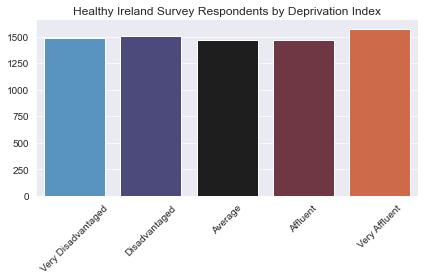

In [4]:
#For this survey - participants were divided into quintiles based on affluence/poverty level
#Equal chance that particpant would be in any of these categories

#List of quintiles that can be assigned to participants
quintiles = ["Very Disadvantaged", "Disadvantaged", "Average", "Affluent", "Very Affluent"]

affluence_levels = np.random.choice(quintiles, 7500, p = [0.2, 0.2, 0.2, 0.2, 0.2])

unique, counts = np.unique(affluence_levels, return_counts = True)
sns.barplot(x = unique, y = counts, palette = "icefire", order = quintiles)

#Plotting elements to check whether proportions are equal
plt.xticks(rotation = 45)
plt.title("Healthy Ireland Survey Respondents by Deprivation Index", fontsize = 12)
plt.tight_layout()
sns.despine()
plt.show()
plt.close()

As seen in the above plot, the proportion of respondents in each quntile is approximately equal.

#### Creating the Dataset

As all other variables in the dataset, such as employment status and health indicators, are dependent on attributes of the individual participants, the three independent variables must now be combined into a Pandas dataframe.

The below code creates the dataframe with three columns for age, gender and deprivation index, using the data already generated for these variables. The dataset is written to a csv file to check the results, and the first five rows are printed.

In [5]:
demographic_dataset = pd.DataFrame({"Gender": gender, "Age": age_dist, "Socioeconomic Status": affluence_levels})
demographic_dataset.to_csv("dataset.csv")

demographic_dataset["Age Category"] = demographic_dataset.apply(age_categories, axis = 1)
age_order = ["15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]

print(demographic_dataset.head(n = 5))

   Gender        Age Socioeconomic Status Age Category
0  Female  66.620720        Disadvantaged        65-74
1    Male  39.423917              Average        35-44
2  Female  50.581121              Average        45-54
3    Male  58.235653        Very Affluent        55-64
4  Female  37.905810             Affluent        35-44


#### Part 2: Simulating Dependent Variables

Dependent variables are those that are influenced by other variables within a dataset. For this simulation, the dependent variables are as follows:
- Employment Status (dependent on gender and age)
- BMI (dependent on age and deprivation index)
- Physical Activity Levels (dependent on BMI and age)
- Alcohol Consumption (dependent on gender and deprivation index)
- Hours Sleep (dependent on age and employment status)

##### Employment Status

Employment status was simulated based on figures from the most recent Labour Force Quarterly Survey. This is a nationwide survey of households designed to provide an accurate accurate measurement of employment and unemployment in Ireland. 

The survey provides estimates for the following: 
- Persons in Employment
- Numbers Unemployed
- Labour Force Participation Rates
- Inactive Population (not in Labour Force)

[Link to Q3 2021 Labour Force Survey](https://data.cso.ie/table/QLF18)

The table linked above provides a percentage breakdown by gender and age of those in employment, unemployed or not active in the labour force.

Reasons for inactivity in the Labour Force include the following:
- Caring/Family Reasons
- In Education or Training
- Illness/Disability
- Retired
- Other reasons

According to the LFS figures:
- Those aged under 20 and over 65 have the highest proportion of individuals not in the labour force.
- Those aged between 25 and 55 have the highest proportion of employed persons.
- After the age of 55, the proportion of active participants in the labour force begins to decrease.
- The proportion of women in the labour force is lower than that of men.

The below code assigns one of three employment options to each participant in the survey (employed, unemployed, not in labour force). The probability of each being selected is influenced by gender and age. The probability assignment is based on the percentage breakdowns stated in the LFS figures. 

In [6]:
employment_choices = ["Employed", "Unemployed", "Not in Labour Force"]

def in_employment (row):
    if row["Gender"] == "Male":
        if row["Age"] <20:
            return np.random.choice(a = employment_choices, p =[0.33, 0.12, 0.55])
        elif row["Age"] >= 20 and row["Age"] < 25:
            return np.random.choice(a = employment_choices, p =[0.68, 0.12, 0.20])
        elif row["Age"] >= 25  and row["Age"] < 35:
            return np.random.choice(a = employment_choices, p =[0.84, 0.07, 0.09])
        elif row["Age"] >= 35  and row["Age"] < 45:
            return np.random.choice(a = employment_choices, p =[0.9, 0.03, 0.07])
        elif row["Age"] >= 45  and row["Age"] < 55:
            return np.random.choice(a = employment_choices, p =[0.85, 0.04, 0.11])
        elif row["Age"] >= 55  and row["Age"] < 59:
            return np.random.choice(a = employment_choices, p =[0.79, 0.04, 0.17])
        elif row["Age"] >= 59  and row["Age"] < 64:
            return np.random.choice(a = employment_choices, p =[0.58, 0.04, 0.38])
        elif row["Age"] >= 65  and row["Age"] < 69:
            return np.random.choice(a = employment_choices, p =[0.1, 0.01, 0.89])
        else:
            return np.random.choice(a = employment_choices, p =[0, 0.06, 0.94])
    else:
        if row["Age"] <20:
            return np.random.choice(a = employment_choices, p =[0.33, 0.16, 0.51])
        elif row["Age"] >= 20 and row["Age"] < 25:
            return np.random.choice(a = employment_choices, p =[0.68, 0.09, 0.23])
        elif row["Age"] >= 25  and row["Age"] < 35:
            return np.random.choice(a = employment_choices, p =[0.77, 0.05, 0.18])
        elif row["Age"] >= 35  and row["Age"] < 45:
            return np.random.choice(a = employment_choices, p =[0.77, 0.05, 0.18])
        elif row["Age"] >= 45  and row["Age"] < 55:
            return np.random.choice(a = employment_choices, p =[0.74, 0.04, 0.22])
        elif row["Age"] >= 55  and row["Age"] < 59:
            return np.random.choice(a = employment_choices, p =[0.67, 0.04, 0.29])
        elif row["Age"] >= 59  and row["Age"] < 64:
            return np.random.choice(a = employment_choices, p =[0.46, 0.05, 0.49])
        elif row["Age"] >= 65  and row["Age"] < 69:
            return np.random.choice(a = employment_choices, p =[0.1, 0.01, 0.89])
        else:
            return np.random.choice(a = employment_choices, p =[0.01, 0.05, 0.94])
        
demographic_dataset["Employment_Status"] = demographic_dataset.apply(in_employment, axis = 1)

The Seaborn countplot function is then used to check the proportions of participants in each of the three employment categories, broken down by age and gender. 

In [7]:
demographic_dataset["Employment_Status"] = demographic_dataset.apply(in_employment, axis = 1)
males = demographic_dataset.loc[demographic_dataset["Gender"] == "Male"]
females = demographic_dataset.loc[demographic_dataset["Gender"] == "Female"]

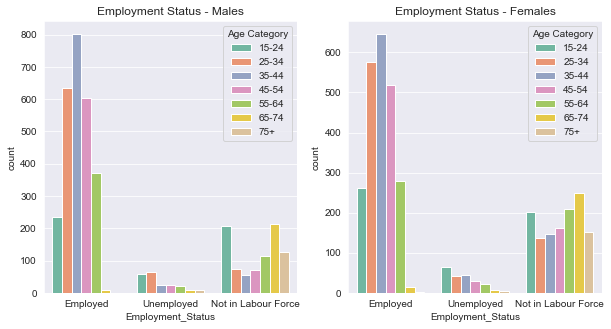

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(10,5))

sns.countplot(ax = ax1, x = "Employment_Status", hue = "Age Category", data = males, hue_order= age_order, order = employment_choices, palette = "Set2")
sns.countplot(ax = ax2, x = "Employment_Status", hue = "Age Category", data = females, hue_order= age_order, order = employment_choices, palette = "Set2")
sns.set_style("whitegrid")
ax1.set_title("Employment Status - Males")
ax2.set_title("Employment Status - Females")
plt.show()
plt.close()

As the resulting plots show, the proportion of males in employment is slightly higher than females, and the proportion of particpants not in the labour force is higher for the oldest and youngest age categories. The proportion of participants in employment is highest in the 25-44 age brackets, and begins to decrease after this point. 

#### BMI

BMI (Body Mass Index) is an estimation of body fat based on height and weight. is calculated by dividing a person's weight in kilograms by height in metres squared (kg/m2). The results are categorized as follows:
- <18.5 : Underweight
- 18.5 - 24.99: Healthy weight
- 25 - 30 : Overweight
- 30 + Obese

Excess weight is linked to a number of negative health outcomes. According to the CDC, overweight and obese individuals are at an increased risk of the following:
- All causes of death (mortality)
- Hypertension
- Increased cholesterol
- Type 2 diabetes
- Osteoarthritis
- Several types of cancer

Obesity is also linked to the onset of metabolic syndrome, which is a cluster of conditions that occur together, increasing the risk of heart disease, stroke and type 2 diabetes. 

Overweight and obesity have become a significant global health concern over the past four decades. Between 1975 and 2016, the worldwide prevalence of obesity nearly tripled between 1975 and 2016. According to the WHO, approximately 40% of adults worldwide are now overweight or obese. In the case of wealthier countries, such as Ireland, this proprtion can be even higher.

The Healthy Ireland survey for 2019 survey reported the following in relation to BMI:
- 37% of respondents overall were overweight and 23% were obese
- The proportion of individuals who are at a healthy weight declines with age, while the proportion of overweight/obese respondents increased
- Older men are more likely to be overweight or obese than women
- Young people living in disadvantaged areas are more likely to be overweight/obese than those in more affluent areas. 

##### BMI Distribution

The distribution for BMI is not likely to be normal, as the proportion of underweight individuals is generally the smallest. This is the case for the Healthy Ireland survey, as just 2% of the sample were underweight.

Therefore, a skewed distribution, where one tail is heavier than the other, may be appropriate. A right-skewed, or positive skew distribution, is a probability distribution with a long right tail, and the mean is to the right of the peak. 

As more respondents in the sample are overweight and obese than normal weight, and this increases with age, the Scipy stats skewnorm distribution could be used, and the skew parameter could be increased with age to move more of the distribution towards the right.  

The below function acts on each row in the dataframe, and depending on the age of the participant, will return a skewnorm variable with adjusted mean and skew parameters. Additionally, the mean parameter is increased for older men and younger people from disadvantaged areas. 

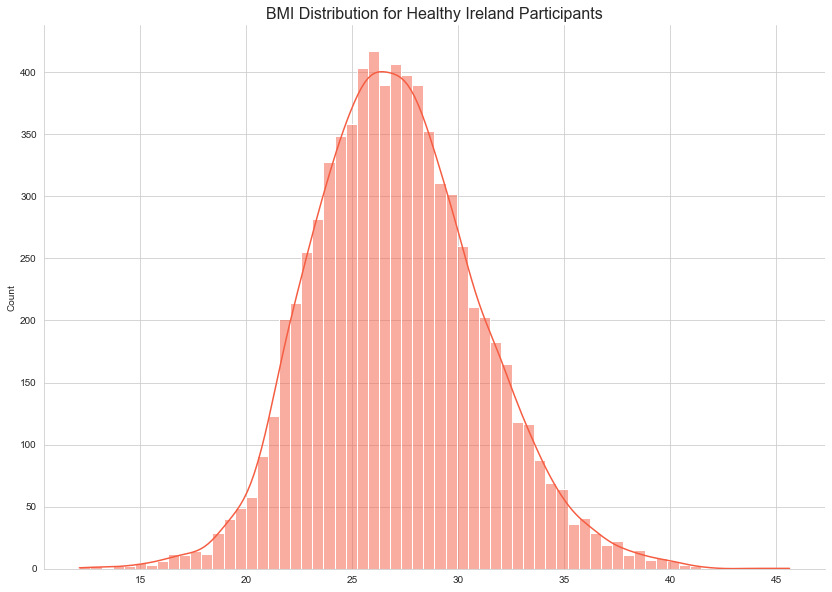

In [9]:
#Setting conditions for BMI assignment
#Std is set to 5 because generally BMI values are in a relatively narrow range (16 - 45)
#For participants that are under 35 and from disadvantaged backgrounds the mean BMI is higher
#For older men, mean BMI is higher than for women of same age

def bmi_assign (row):
    if row ["Gender"] == "Male":
        if row["Age"] <= 24:
            if row["Socioeconomic Status"] == ("Disadvantaged") or row["Socioeconomic Status"] == ("Very Disadvantaged"):
                return skewnorm.rvs(a = 2, loc = 26, scale = 5, size = 1)
            else:
                return skewnorm.rvs(a = 1, loc = 20, scale = 5, size = 1)
        elif row["Age"] > 24 and row["Age"] <= 34:
            if row["Socioeconomic Status"] == ("Disadvantaged") or row["Socioeconomic Status"] == ("Very Disadvantaged"):
                return skewnorm.rvs(a = 2, loc = 26, scale = 5, size = 1)
            else:
                return skewnorm.rvs(a = 2, loc = 22, scale = 3, size = 1)
        elif row["Age"] > 34 and row["Age"] <= 44:
            return skewnorm.rvs(a = 2, loc = 23, scale = 5, size = 1)
        elif row["Age"] > 44 and row["Age"] <= 54:
            return skewnorm.rvs(a = 2, loc = 25, scale = 5, size = 1)
        elif row["Age"] > 54 and row["Age"] <= 64:
            return skewnorm.rvs(a = 3, loc = 25, scale = 5, size = 1)
        elif row["Age"] > 64 and row["Age"] <= 74:
            return skewnorm.rvs(a = 3, loc = 26, scale = 5, size = 1)
        else:
            return skewnorm.rvs(a = 3, loc = 26.5, scale = 5, size = 1)
    else:
        if row["Age"] <= 24:
            if row["Socioeconomic Status"] == ("Disadvantaged") or row["Socioeconomic Status"] == ("Very Disadvantaged"):
                return skewnorm.rvs(a = 2, loc = 25, scale = 5, size = 1)
            else:
                    return skewnorm.rvs(a = 2, loc = 20, scale = 5, size = 1)
        elif row["Age"] > 24 and row["Age"] <= 34: 
            if row["Socioeconomic Status"] == ("Disadvantaged") or row["Socioeconomic Status"] == ("Very Disadvantaged"):
                return skewnorm.rvs(a = 2, loc = 26, scale = 3, size = 1)
            else:
                return skewnorm.rvs(a =2, loc = 22, scale = 3, size = 1)
        elif row["Age"] > 34 and row["Age"] <= 44:
                return skewnorm.rvs(a = 2, loc = 23, scale = 5, size = 1)
        elif row["Age"] > 44 and row["Age"] <= 54:
                return skewnorm.rvs(a = 2, loc = 23, scale = 5, size = 1)
        elif row["Age"] > 54 and row["Age"] <= 64:
                return skewnorm.rvs(a = 2, loc = 25, scale = 5, size = 1)
        elif row["Age"] > 64 and row["Age"] <= 74:
                return skewnorm.rvs(a = 2, loc = 25, scale = 5, size = 1)
        else:
                return skewnorm.rvs(a = 2, loc = 26, scale = 5, size = 1)

demographic_dataset["BMI"] = demographic_dataset.apply(bmi_assign, axis = 1)
demographic_dataset.to_csv("dataset.csv")

bmi_values = []
bmi_classification = []
for value in demographic_dataset["BMI"].values:
    bmi_values.append(value.item())
    if value.item() < 18.5:
        classification = "Underweight"
    elif value.item() >= 18.5 and value.item () < 25:
        classification = "Healthy Weight"
    elif value.item() >= 25 and value.item () < 30:
        classification = "Overweight"
    else:
        classification = "Obese"
    bmi_classification.append(classification)

demographic_dataset["BMI"] = bmi_values
demographic_dataset["BMI Classification"] = bmi_classification

demographic_dataset.to_csv("dataset.csv")

fig, ax = plt.subplots(figsize = (14, 10))
sns.set_style ("white")
sns.histplot(ax = ax, data = bmi_values, kde = True, color = "#f55d42")
ax.set_title("BMI Distribution for Healthy Ireland Participants", fontsize = 16)
sns.despine ()
plt.show()
plt.close()


The above distribution is skewed slightly to the right, reflecting that the majority of survey participants were in the overweight and obese categories. The peak is at about 26, which is logical as the majority of participants in the older categories were overweight.

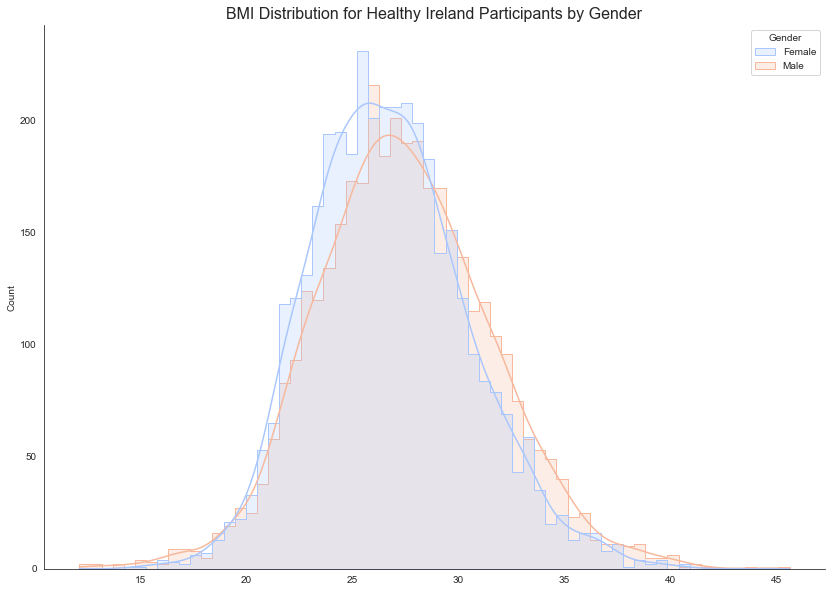

In [10]:
fig, ax = plt.subplots(figsize = (14, 10))
sns.set_style ("white")
sns.histplot(ax = ax, data = demographic_dataset, x = bmi_values, kde = True, color = "#f55d42", hue = "Gender", element = "step", palette = "coolwarm")
ax.set_title("BMI Distribution for Healthy Ireland Participants by Gender", fontsize = 16)
sns.despine ()
plt.show()
plt.close()

The above distribution shows the BMI for each gender. As we can see, the distribution for the male cohort is skewed further to the right than the female, as men are more likely than women to be overweight/obese, particularly the older demographics. 

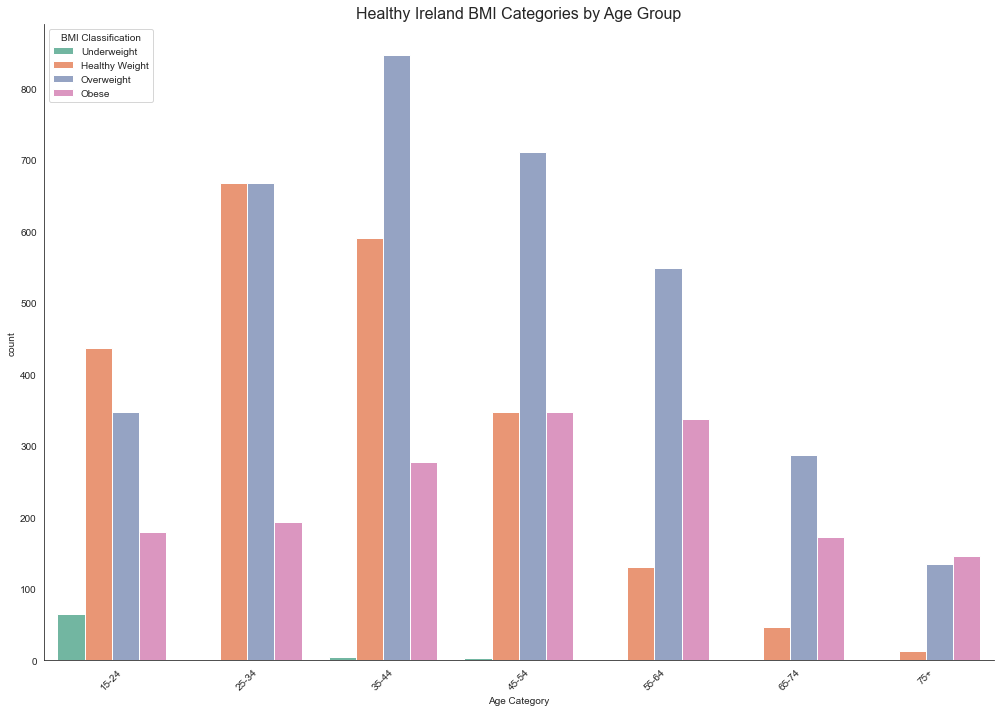

In [11]:
bmi_order = ["Underweight", "Healthy Weight", "Overweight", "Obese"]
fig, ax = plt.subplots(figsize = (14, 10))
sns.countplot(x = "Age Category", hue = "BMI Classification", order = age_order, hue_order=bmi_order, data = demographic_dataset, palette = "Set2")
ax.set_title("Healthy Ireland BMI Categories by Age Group", fontsize = 16)
sns.despine()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
plt.close()

Above is a plot showing the total participants in each BMI category (underweight, healthy, overweight, obese). We can see that as the age profile of the participants increases, so does the proportion of overweight and obese individuls.

The under-35 cohort has the highest proportion of healthy-weight individuals, although a considerable proportion are overweight/obese, which is likely influenced to some extent by the participants from disadvantaged areas. 

#### Physical Activity Levels

As part of the Healthy Ireland Survey, participants were asked to estimate how many minutes in the last 7 days they spent being physically active. The responses were assessed in the context of the WHO Physical Activity guidelines, which recommends that adults show have at least 30 minutes of moderate activity per day/150 minutes per week.

The survey reported the following:
- Approximately 46% of survey participants met the physical activity guidelines
- The 15-24 age cohort were the most likely to be physically active
- The proportion of respondents meeting the guidelines decreased with age
- Men at all ages were more likely to be physically active than women. This divergence was largest for the 15-24 age group.
- Obese people, particularly those in the younger age categories, were much less likely to be physically active than non-obese respondents. 

#### Distribution
The exact distribution for minutes spent exercising per week was not included in the survey, however a skewed distribution could be used again for this variable. We know that women, as well as older and obese individuals are less likely to meet the exercise guidelines, so the distribution could be skewed to the left for these participants, and to the right for younger people and men. 

The below fuction applies the skewnorm probibility to each participant in the dataset. Conditions affecting the variable returned (in terms of mean and left/right skew values) include BMI (for the younger age cohorts), gender and age. 

Once the exercise data has been generated, each participant is evaluated to determine whether or not they're meeting the WHO weekly exercise guidelines (>150 mins per week), and this evaluation is written to a new column in the dataframe. 

In [22]:
#This function uses the scipy stats skewnorm function to calculate probably exercise time
#The mean and skew values are changed to reproduce the survey results
# For younger participants, the value will be skewed right, for older it will be skewed left
# Obese participants in the younger age groups also have reduced mean exercise times, 
#and no positive skew

def mins_exercise(row):
        if row["Gender"] == 'Male':
            if row["Age"] <= 24:
                if row["BMI Classification"] == "Obese":
                     return skewnorm.rvs(a = 0, loc = 120, scale = 40, size = 1)
                else:
                    return skewnorm.rvs(a = 2, loc = 150, scale = 40, size = 1)
            elif row["Age"] > 24 and row["Age"] <= 44:
                if row["BMI Classification"] == "Obese":
                    return skewnorm.rvs(a = 0, loc = 110, scale = 40, size = 1)
                else:
                    return skewnorm.rvs(a = 2, loc = 140, scale = 40, size = 1)
            elif row["Age"] > 44 and row["Age"] <= 54:
                return skewnorm.rvs(a = 0, loc = 140, scale = 40, size = 1)
            elif row["Age"] > 54 and row["Age"] <= 64:
                return skewnorm.rvs(a = 0, loc = 130, scale = 40, size = 1)
            elif row["Age"] > 64 and row["Age"] <= 74:
                return skewnorm.rvs(a = -1, loc = 120, scale = 40, size = 1)
            elif row["Age"] > 74:
                return skewnorm.rvs(a = -1, loc = 110, scale = 40, size = 1)

        else:
            if row["Age"] <= 24:
                if row["BMI Classification"] == "Obese":
                      return skewnorm.rvs(a = 0, loc = 120, scale = 40, size = 1)
                else:
                      return skewnorm.rvs(a = 1, loc = 140, scale = 40, size = 1)
            elif row["Age"] > 24 and row["Age"] <= 44:
                if row["BMI Classification"] == "Obese":
                      return skewnorm.rvs(a = 0, loc = 100, scale = 40, size = 1)
                else:
                      return skewnorm.rvs(a = 1, loc = 130, scale = 40, size = 1)
            elif row["Age"] > 44 and row["Age"] <= 54:
                return skewnorm.rvs(a = 0, loc = 120, scale = 40, size = 1)
            elif row["Age"] > 54 and row["Age"] <= 64:
                return skewnorm.rvs(a = 0, loc = 100, scale = 40, size = 1)
            elif row["Age"] > 64 and row["Age"] <= 74:
                  return skewnorm.rvs(a = -1, loc = 110, scale = 40, size = 1)
            elif row["Age"] > 74:
                return skewnorm.rvs(a = -1, loc = 100, scale = 40, size = 1)

demographic_dataset["Minutes Exercise per Week"] = demographic_dataset.apply(mins_exercise, axis = 1)
demographic_dataset.to_csv("dataset.csv")

minutes_exercise = []
meeting_guidelines = []
for value in demographic_dataset["Minutes Exercise per Week"].values:
    #need to convert individual arrays to single elements to plot them
    minutes_exercise.append(value.item())
    if value.item ()  > 150:
        is_meeting = "Yes"
    else:
        is_meeting = "No"
    meeting_guidelines.append(is_meeting)

demographic_dataset["Minutes Exercise per Week"] = minutes_exercise
demographic_dataset["Meeting Exercise Guidelines"] = meeting_guidelines

The below plot checks the proportion of individuals meeting the guidelines compared to those who did not. 

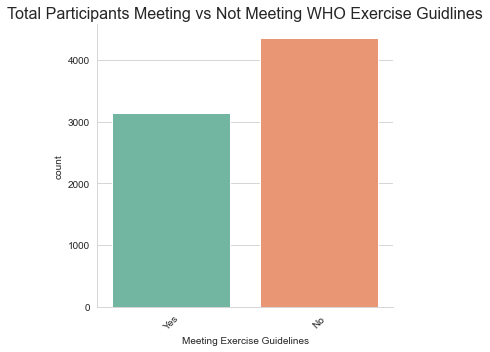

In [25]:
fig, ax = plt.subplots(figsize = (5, 5))
exercise_order = ["Yes", "No"]
sns.countplot(x = "Meeting Exercise Guidelines", hue_order=bmi_order, data = demographic_dataset, palette = "Set2", order = exercise_order)
ax.set_title("Total Participants Meeting vs Not Meeting WHO Exercise Guidlines", fontsize = 16)
sns.despine()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
plt.close()

Approximately 3000 individuals are meeting the WHO physical activity guidelines (40%), which is reasonably close to the figure reported in the Healthy Ireland survey (46%). 

Next, the distribution of weekly exercise time for men vs women is plotted.

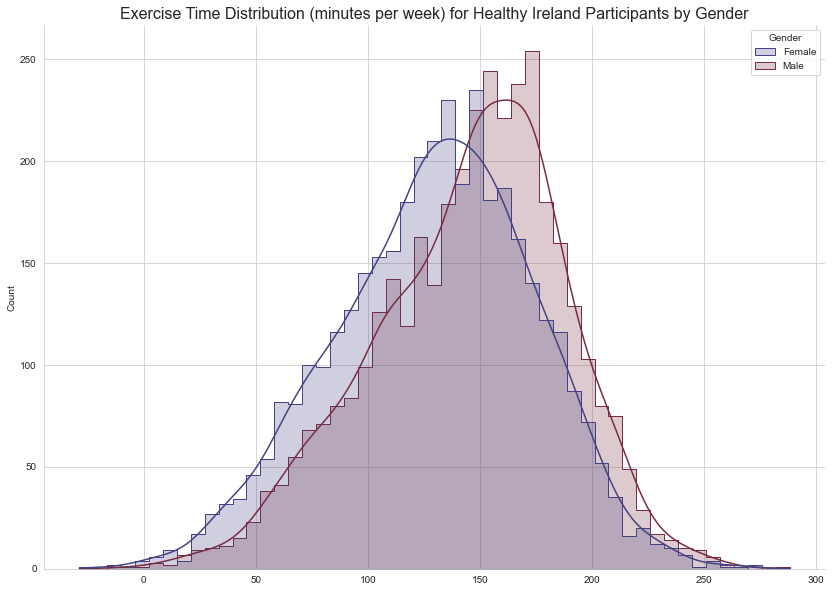

In [26]:
fig, ax = plt.subplots(figsize = (14, 10))
sns.set_style ("white")
sns.histplot(ax = ax, data = demographic_dataset, x = minutes_exercise, kde = True, color = "#f55d42", hue = "Gender", element = "step", palette = "icefire")
ax.set_title("Exercise Time Distribution (minutes per week) for Healthy Ireland Participants by Gender", fontsize = 16)
sns.despine ()
plt.show()
plt.close()

- The distribution is skewed further to the right for males than females, indicating that men spend more time exercising each week than women.
- The peak/mean for women is approximately 150, and for men it is slightly higher, indicating that a higher proportion of men exceed the physical activity guidelines. 

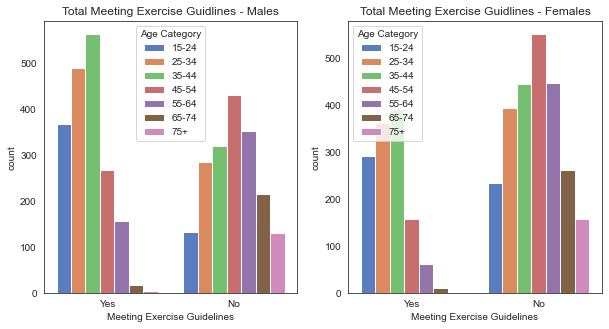

In [27]:
males = demographic_dataset.loc[demographic_dataset["Gender"] == "Male"]
females = demographic_dataset.loc[demographic_dataset["Gender"] == "Female"]

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(10,5))

exercise_order = ["Yes", "No"]

sns.countplot(ax = ax1, x = "Meeting Exercise Guidelines", hue = "Age Category", order = exercise_order, data = males, hue_order= age_order, palette = "muted")
sns.countplot(ax = ax2, x = "Meeting Exercise Guidelines", hue = "Age Category", order = exercise_order, data = females, hue_order= age_order, palette = "muted")
sns.set_style("whitegrid")
ax1.set_title("Total Meeting Exercise Guidlines - Males")
ax2.set_title("Total Meeting Exercise Guidlines - Females")
plt.show()
plt.close()

- As the breakdown by age group demonstrates, the majority of younger respondents (<25) are meeting the WHO exercise gidelines, and this is more pronounced in male participants than females.
- The proportion of participants meeting the guidelines declines with age, with very few individuals in the oldest categories exercising more than 150 minutes per week. 
- In every age category, the proportion of men meeting the exercise guidelines is higher than women. 

#### Alcohol Consumption

It is common knowledge that the Irish population has a high level of alcohol consumption and that many of us engage in harmful drinking patterns. In 2019, annual alcohol consumption per person aged 15 and over was 10.8 litres of alcohol which equates to 40 (700ml) bottles of vodka, 113 (750ml) bottles of wine, or 436 pints of beer. 

As a reduction in alcohol consumption would lead to reduced prevalence of several health conditions, including cardiovascular disease and cancer, as well as a decline in alcohol dependency and alcoholic liver disease, this is an ongoing area of focus for public health initiatives such as those conducted by Healthy Ireland.

In order to model the alcohol consumption of the Irish poplulation, two more resources were used in addition to the Healthy Ireland Survey. The first was the Health Research Board (HRB) review of alcohol consumption, alcohol related harm and alcohol policy in Ireland. This paper provided detailed breakdowns of alcohol consumption by gender, age and socioeconomic status in Ireland, and uses data from past Healthy Ireland surveys.

The following survey results were reported by the HRB:
- People from affluent areas were more likely to drink than those from disadvantaged areas; this may be related to the affordability of alcohol.
- However, people in more disadvantaged areas are more likely to binge-drink than participants in affluent areas.
- Those aged 65 and over were more likely to abstain from alcohol than younger people
- Men tend to consume more alcohol than women, with higher proportions of men consuming more than 6 drinks on a single occasion.

The second was a 2012 study by Kehoe et al that tested the suitability of several probability distributions to model alcohol consumption data for several countries. This study determined, based on data from more than 20 countries (including Ireland) that the gamma distribution was the best fit for this purpose. Therefore, the gamma distribution is used to model alcohol consumption for Healthy Ireland survey respondents. Additionally, this survey included daily alcohol consumption data (g/day) for both men and women. As neither the Healthy Ireland nor the HRB surveys provided daily consumption data, these figures were used as a basis for the simulated distributions. 

The below function aims to identify the proportion of survey respondents who do not drink alcohol. These will be excluded from the second function that assigns variables from the gamma distribution to participants, which will represent their daily alcohol consumption. The probabilities are based on percentage breakdowns in the HRB survey of alcohol consumption by affluence level. As a higher proportion of individuals aged over 65 do not drink alcohol, separate probabilities are estimated for this cohort. 

In [29]:
alcohol_choices = ["Drinks Alcohol", "Does Not Drink Alcohol"]

def drinks_alcohol(row):
    if row["Age"] < 65:
        if row["Socioeconomic Status"] == "Very Disadvantaged":
            return np.random.choice(alcohol_choices, p = [0.71, 0.29])
        elif row["Socioeconomic Status"] == "Disadvantaged":
            return np.random.choice(alcohol_choices, p = [0.72, 0.28])
        elif row["Socioeconomic Status"] == "Average":
            return np.random.choice(alcohol_choices, p = [0.76, 0.24])
        elif row["Socioeconomic Status"] == "Affluent":
            return np.random.choice(alcohol_choices, p = [0.79, 0.21])
        else:
            return np.random.choice(alcohol_choices, p = [0.83, 0.17])
    else:
        if row["Socioeconomic Status"] == "Very Disadvantaged":
            return np.random.choice(alcohol_choices, p = [0.65, 0.35])
        elif row["Socioeconomic Status"] == "Disadvantaged":
            return np.random.choice(alcohol_choices, p = [0.60, 0.40])
        elif row["Socioeconomic Status"] == "Average":
            return np.random.choice(alcohol_choices, p = [0.68, 0.32])
        elif row["Socioeconomic Status"] == "Affluent":
            return np.random.choice(alcohol_choices, p = [0.70, 0.30])
        else:
            return np.random.choice(alcohol_choices, p = [0.75, 0.25])

demographic_dataset["Drinks Alcohol"] = demographic_dataset.apply(drinks_alcohol, axis = 1)
demographic_dataset.to_csv("dataset.csv")

Below, a plot is generated to compare the counts of those who consume alcohol vs those who do not, grouped by affluence level. 

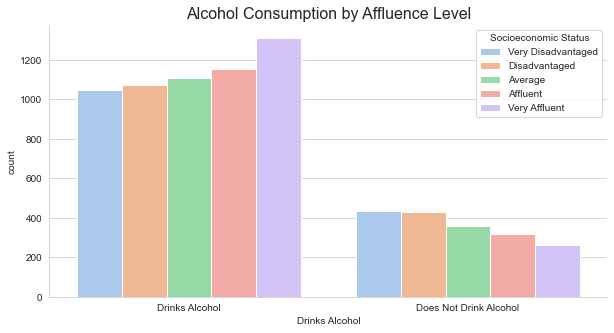

In [66]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(ax = ax, x = "Drinks Alcohol", hue = "Socioeconomic Status", order = alcohol_choices, data = demographic_dataset, hue_order= quintiles, palette = "pastel")
sns.set_style("whitegrid")
ax.set_title("Alcohol Consumption by Affluence Level", fontsize = 16)
sns.despine()
plt.show()
plt.close()

As the above plot illustrates, the highest proportion of individuals who do not consume alcohol are in the Very Disadvantaged and Disadvantaged quintiles, and the proportion decreases in tandem with affluence level. 

Next, the alcohol consumption distribution, in g/day was estimated. The figures given in the study be Kehoe et al (2012) formed the basis for the shape and scale parameters, and these were adjusted up/downwards for those living in disadvantaged areas and those aged over 65 years respectively. For those who were recorded as not consuming alcohol in the previous section, the value returned for alcohol consumption level is simply 0.

Increasing the shape parameter of the gamma distribution will flatten the curve and increase the surface area covered. The shape parameter is therefore increased for males, who have higher levels of alcohol consumption. 

In [57]:
def alcohol_consumption(row):
    if row["Drinks Alcohol"] == "Drinks Alcohol":
    
    #Values adjusted downwards for over 65 and upwards for those from disadvantaged areas
        if row["Age"] < 65:
                    if row ["Gender"] == "Male":
                        if row["Socioeconomic Status"] == "Very Disadvantaged" or row["Socioeconomic Status"] == "Disadvantaged":
                            return np.random.gamma(shape = 3, scale = 60, size = 1)
                        else:
                            return np.random.gamma(shape = 3, scale = 42, size = 1)
                    else:
                        if row["Socioeconomic Status"] == "Very Disadvantaged" or row["Socioeconomic Status"] == "Disadvantaged":
                            return np.random.gamma(shape = 2, scale = 25, size = 1)
                        else:
                            return np.random.gamma(shape = 2, scale = 15.55, size = 1)
        else:

            if row ["Gender"] == "Male":
                        if row["Socioeconomic Status"] == "Very Disadvantaged" or row["Socioeconomic Status"] == "Disadvantaged":
                            return np.random.gamma(shape = 3, scale = 40, size = 1)
                        else:
                            return np.random.gamma(shape = 3, scale = 20, size = 1)
            else:
                        if row["Socioeconomic Status"] == "Very Disadvantaged" or row["Socioeconomic Status"] == "Disadvantaged":
                            return np.random.gamma(shape = 2, scale = 20, size = 1)
                        else:
                            return np.random.gamma(shape = 2, scale = 10, size = 1)
    else:
        return np.zeros(1)

demographic_dataset["Alcohol Consumption"] = demographic_dataset.apply(alcohol_consumption, axis = 1)

#Convert arrays to numbers so they can be plotted
alc_consumption = []

for value in demographic_dataset["Alcohol Consumption"].values:
    alc_consumption.append(value.item())

The below code generates a histogram to compare the alcohol consumption distributions for men and women.

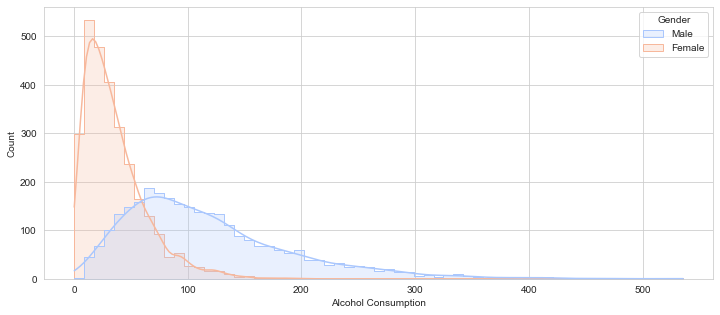

In [53]:
fig, ax = plt.subplots(figsize=(12,5))
demographic_dataset["Alcohol Consumption"] = alc_consumption
alc_consumers = demographic_dataset.loc[demographic_dataset["Drinks Alcohol"] == "Drinks Alcohol" ]
sns.histplot(x = alc_consumers["Alcohol Consumption"], hue = alc_consumers["Gender"], palette= "coolwarm", kde = True, element = "step")
plt.show()
plt.close()

As we can see, the distribution for alcohol consumption is skewed more to the right and covers a larger area for men than women, indicating their tendency to consume more during a single occasion than women. 

Next, the distribution for those from the very affluent vs the very disadvantage cohorts is plotted.

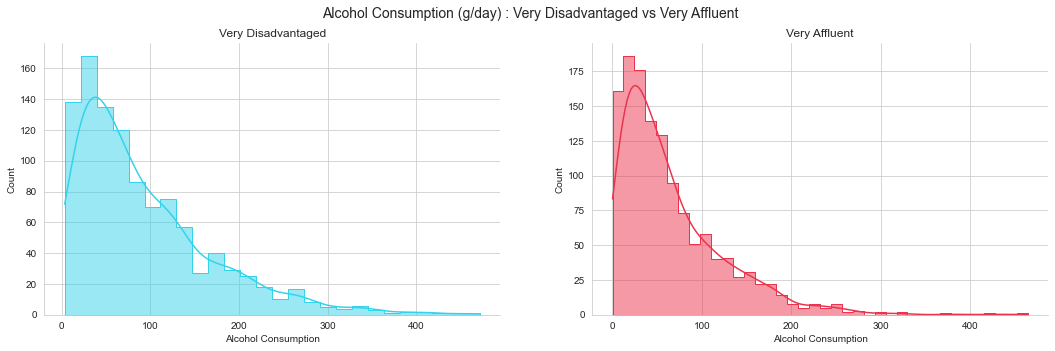

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(18,5))
disadvantaged = alc_consumers.loc[alc_consumers["Socioeconomic Status"] == "Very Disadvantaged" ]
affluent = alc_consumers.loc[alc_consumers["Socioeconomic Status"] == "Very Affluent" ]
plt.suptitle("Alcohol Consumption (g/day) : Very Disadvantaged vs Very Affluent", fontsize = 14)
sns.histplot(ax = ax1, x = disadvantaged["Alcohol Consumption"], color = "#34d2eb", kde = True, element = "step")
ax1.set_title("Very Disadvantaged")
sns.histplot(ax = ax2, x = affluent["Alcohol Consumption"], color = "#eb344c", kde = True, element = "step")
ax2.set_title("Very Affluent")
sns.despine()
plt.show()
plt.close()

We can see that the mean value for daily alcohol consumption is slightly lower for those from the very affluent cohort. Addiitionally, while much of the distribution for the very affluent cohort is clustered around the mean, the proportion of those in the very disadvantaged cohort consuming >100 g/alcohol per day is substantially higher. Therefore, these distributions appear to reflect the HRB findings that people from disadvantaged areas are more likely to binge drink than those from more affluent regions. 

#### Smoking Status

An additional resource was used to determine the smoking status of the Irish population; a study published by the HSE on adult smoking in Ireland, based on data from previous Healthy Ireland surveys and The Irish Longitudinal Study on Ageing (TILDA). 

This survey divided the Irish population into three categories - current smokers, ex smokers and those who never smoked. The following observations were reported:
- The highest proportion of individuals who never smoked were in the 15 - 24 age category
- The highest proportion of current smokers were in the 25 - 34 category, and it declines after this age
- Those from disadvantaged areas were more likely to be current or ex smokers than those from affluent areas

The below function assigns participants to one of these three categories. The relative probability of assignment to these categories is influenced by age and level of affluence.

In [90]:
smoking_choices = ["Current Smoker", "Ex Smoker", "Never Smoked"]

def smoking_status(row):
        if row["Age"] <= 24:
            if row["Socioeconomic Status"] == "Very Disadvantaged":
                return np.random.choice(smoking_choices, p = [0.4,0.1,0.5])
            if row["Socioeconomic Status"] == "Disadvantaged":
                return np.random.choice(smoking_choices, p = [0.3,0.1,0.6])
            if row["Socioeconomic Status"] == "Average":
                return np.random.choice(smoking_choices, p = [0.3,0.1,0.6])
            if row["Socioeconomic Status"] == "Affluent":
                return np.random.choice(smoking_choices, p = [0.2,0.1,0.7])
            if row["Socioeconomic Status"] == "Very Affluent":
                return np.random.choice(smoking_choices, p = [0.15,0.05,0.8])

        elif row["Age"] > 24 and row["Age"] <= 35:
            if row["Socioeconomic Status"] == "Very Disadvantaged":
                return np.random.choice(smoking_choices, p = [0.6,0.2,0.2])
            if row["Socioeconomic Status"] == "Disadvantaged":
                return np.random.choice(smoking_choices, p = [0.5,0.2,0.3])
            if row["Socioeconomic Status"] == "Average":
                return np.random.choice(smoking_choices, p = [0.45,0.05,0.5])
            if row["Socioeconomic Status"] == "Affluent":
                return np.random.choice(smoking_choices, p = [0.4,0.1,0.5])
            if row["Socioeconomic Status"] == "Very Affluent":
                return np.random.choice(smoking_choices, p = [0.4,0.1,0.5])

        elif row["Age"] > 34 and row["Age"] <= 45:
                if row["Socioeconomic Status"] == "Very Disadvantaged":
                    return np.random.choice(smoking_choices, p = [0.3,0.4,0.3])
                if row["Socioeconomic Status"] == "Disadvantaged":
                    return np.random.choice(smoking_choices, p = [0.3,0.4,0.3])
                if row["Socioeconomic Status"] == "Average":
                    return np.random.choice(smoking_choices, p = [0.2,0.5,0.3])
                if row["Socioeconomic Status"] == "Affluent":
                    return np.random.choice(smoking_choices, p = [0.1,0.6,0.3])
                if row["Socioeconomic Status"] == "Very Affluent":
                    return np.random.choice(smoking_choices, p = [0.1,0.5,0.4])
        
        elif row["Age"] > 44 and row["Age"] <= 55:
                if row["Socioeconomic Status"] == "Very Disadvantaged":
                    return np.random.choice(smoking_choices, p = [0.2,0.6,0.2])
                if row["Socioeconomic Status"] == "Disadvantaged":
                    return np.random.choice(smoking_choices, p = [0.3,0.5,0.2])
                if row["Socioeconomic Status"] == "Average":
                    return np.random.choice(smoking_choices, p = [0.2,0.5,0.3])
                if row["Socioeconomic Status"] == "Affluent":
                    return np.random.choice(smoking_choices, p = [0.1,0.6,0.3])
                if row["Socioeconomic Status"] == "Very Affluent":
                    return np.random.choice(smoking_choices, p = [0.1,0.6,0.3])
        
        elif row["Age"] > 54 and row["Age"] <= 65:
                    if row["Socioeconomic Status"] == "Very Disadvantaged":
                        return np.random.choice(smoking_choices, p = [0.2,0.5,0.3])
                    if row["Socioeconomic Status"] == "Disadvantaged":
                        return np.random.choice(smoking_choices, p = [0.2,0.5,0.3])
                    if row["Socioeconomic Status"] == "Average":
                        return np.random.choice(smoking_choices, p = [0.1,0.5,0.4])
                    if row["Socioeconomic Status"] == "Affluent":
                        return np.random.choice(smoking_choices, p = [0.05,0.55,0.4])
                    if row["Socioeconomic Status"] == "Very Affluent":
                        return np.random.choice(smoking_choices, p = [0.05,0.35,0.6])
            
        elif row["Age"] > 54 and row["Age"] <= 65:
                    if row["Socioeconomic Status"] == "Very Disadvantaged":
                        return np.random.choice(smoking_choices, p = [0.1,0.6,0.3])
                    if row["Socioeconomic Status"] == "Disadvantaged":
                        return np.random.choice(smoking_choices, p = [0.2,0.5,0.2])
                    if row["Socioeconomic Status"] == "Average":
                        return np.random.choice(smoking_choices, p = [0.1,0.6,0.3])
                    if row["Socioeconomic Status"] == "Affluent":
                        return np.random.choice(smoking_choices, p = [0.05,0.55,0.3])
                    if row["Socioeconomic Status"] == "Very Affluent":
                        return np.random.choice(smoking_choices, p = [0.05,0.4,0.55])
            
        else:
                    if row["Socioeconomic Status"] == "Very Disadvantaged":
                        return np.random.choice(smoking_choices, p = [0.05,0.85,0.1])
                    if row["Socioeconomic Status"] == "Disadvantaged":
                        return np.random.choice(smoking_choices, p = [0.05,0.85,0.1])
                    if row["Socioeconomic Status"] == "Average":
                        return np.random.choice(smoking_choices, p = [0.05,0.65,0.3])
                    if row["Socioeconomic Status"] == "Affluent":
                        return np.random.choice(smoking_choices, p = [0.05,0.55,0.4])
                    if row["Socioeconomic Status"] == "Very Affluent":
                        return np.random.choice(smoking_choices, p = [0.05,0.4,0.55])


demographic_dataset["Smoking Status"] = demographic_dataset.apply(smoking_status, axis = 1)

First, the total participants in each category, broken down by socioeconomic status, is plotted.

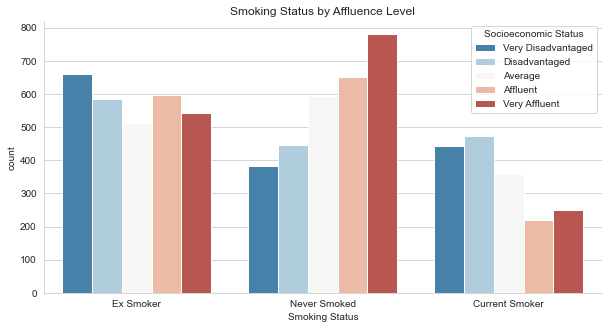

In [91]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = "Smoking Status", data = demographic_dataset, hue = "Socioeconomic Status", hue_order=quintiles, palette = "RdBu_r")
plt.title("Smoking Status by Affluence Level")
sns.despine()
plt.show()
plt.close()

As the plot illustrates, the highest proportion of current smokers are in the disadvantaged groups, while the highest proportion of individuals who never smoked are in the affluent categories. 

Next, the smoking status of respondents based on age category is plotted.

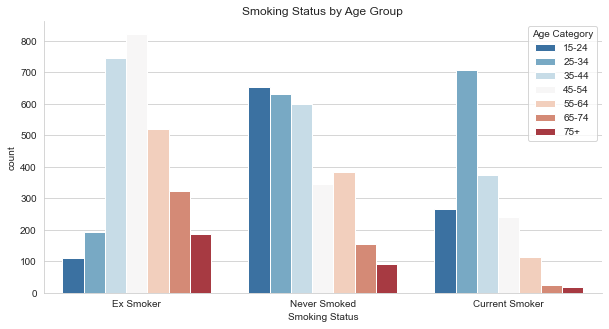

In [92]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = "Smoking Status", data = demographic_dataset, hue = "Age Category", hue_order=age_order, palette = "RdBu_r")
plt.title("Smoking Status by Age Group")
sns.despine()
plt.show()
plt.close()

As the plot shows, the largest proportion of indivduals who never smoked are in the younger age categories. The highest proportion of current smokers are the 25 - 34 age group, which decreases with age. 

As with the alcohol consumption variables in the previous section, the next step is to approximate the distribution of cigarettes smoked per day by respondents.

There was little data available online regarding an appropriate distribution. However, the HRB data includes both occasional and daily smokers in the current smoker cohort, and total cigarettes smoked can vary from 1 - 100 per day for daily smokers and 1 - 80 per day for occasional smokers. However, the median cigarettes smoked for these cohorts was 12.5 per day and 10 per week respectively. As the majority of smokers are therefore at the lower end of the scale, the exponential distribution, with a peak at around 5 cigarettes per day, was chosen to approximate the distribution of cigarette smoking. 

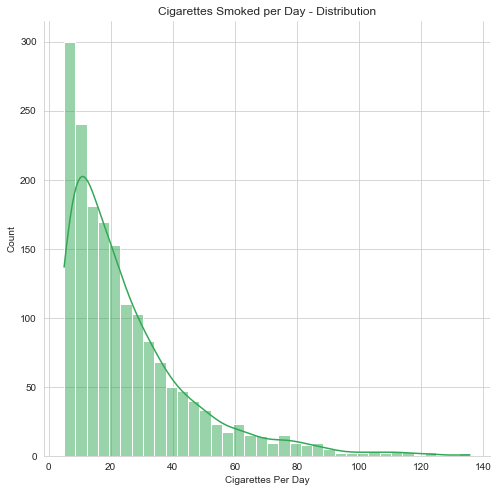

In [103]:
def cigs_per_day(row):
    if row["Smoking Status"] == "Current Smoker":
        return expon.rvs(size = 1, loc  = 5, scale = 20)
    else:
        return np.zeros(1)

demographic_dataset["Cigarettes Per Day"] = demographic_dataset.apply(cigs_per_day, axis = 1)

daily_cigs = []

for value in demographic_dataset["Cigarettes Per Day"].values:
    daily_cigs.append(value.item())
demographic_dataset["Cigarettes Per Day"] = daily_cigs

smokers_only =  demographic_dataset.loc[demographic_dataset["Smoking Status"] == "Current Smoker"]

fig, ax = plt.subplots(figsize = (8,8))
plt.title("Cigarettes Smoked per Day - Distribution")
sns.histplot(smokers_only["Cigarettes Per Day"], kde = True,  color = "#32a856")
sns.despine()
plt.show()
plt.close()

As the above plot shows, the distribution peaks at approximately 5 cigarettes per day and subsequently tapers off, with relatively few participants smoking 60+ cigarettes per day.